[FIFA 18 Complete Player Dataset](https://www.kaggle.com/thec03u5/fifa-18-demo-player-dataset)

**Possible Explorations**
1. Make your dream team
2. Analyse which Club or National Team has the best-rated players
3. Assess the strength of a team at a particular position
4. Analyse the team with the best dribbling speed
5. Co-relate between Age and Overall rating
6. Co-relate between Age and Nationality
7. Co-relate between Age and Potential

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
sns.set_style('darkgrid')

In [4]:
import warnings
warnings.filterwarnings('ignore')

### Read the dataset

In [5]:
df = pd.read_csv(r'E:\Coding Nest\DSProjects\FIFA18\fifa-18-demo-player-dataset\CompleteDataset.csv')

### EDA (Exploratory Data Analysis)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 75 columns):
Unnamed: 0             17981 non-null int64
Name                   17981 non-null object
Age                    17981 non-null int64
Photo                  17981 non-null object
Nationality            17981 non-null object
Flag                   17981 non-null object
Overall                17981 non-null int64
Potential              17981 non-null int64
Club                   17733 non-null object
Club Logo              17981 non-null object
Value                  17981 non-null object
Wage                   17981 non-null object
Special                17981 non-null int64
Acceleration           17981 non-null object
Aggression             17981 non-null object
Agility                17981 non-null object
Balance                17981 non-null object
Ball control           17981 non-null object
Composure              17981 non-null object
Crossing               17981 non-null obj

In [7]:
df.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID',
       'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

### As per requirement, we are selecting few features

In [8]:
df = df[['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value', 'Preferred Positions']]
df.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Positions
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,ST LW
1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,RW
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,LW
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,ST
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,GK


### Data Engineering

In [9]:
# Remaining Potential
df['Remaining Potential'] = df['Potential'] - df['Overall']

# Preferred position (first only)
df['Preferred Positions'] = df['Preferred Positions'].apply(lambda x:x.split()[0])
df.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Positions,Remaining Potential
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,ST,0
1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,RW,0
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,LW,2
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,ST,0
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,GK,0


In [10]:
#Convert Value into same unit, K to M
df['Unit'] = df['Value'].str[-1]
df['Value (M)'] = np.where(df['Unit'] == '0', 0, df['Value'].str[1:-1].replace(r'[a-zA-Z]',''))
df['Value (M)'] = df['Value (M)'].astype(float)
df['Value (M)'] = np.where(df['Unit'] == 'M', df['Value (M)'], df['Value (M)']/1000)
df = df.drop('Unit', 1)
df.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Positions,Remaining Potential,Value (M)
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,ST,0,95.5
1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,RW,0,105.0
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,LW,2,123.0
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,ST,0,97.0
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,GK,0,61.0


### Geographical representation of all Players

### Co-relate between Age and Nationality

In [11]:
def plot_geo(by_column, measure, sort_column, chart_title, min_rating = 0):
    df_g = df.copy()
    df_g = df_g[df_g['Overall']>min_rating]
    df_geo = df_g.groupby(['Nationality']).agg({by_column: measure})
    df_geo = pd.DataFrame(data = df_geo)
    df_geo = df_geo.rename(columns={by_column: 'Measurement'})
    df_geo['text'] = ''

    df_geo_player = df[['Nationality','Name', sort_column]].groupby(['Nationality']).head(3)
    df_geo_player = df_geo_player.sort_values(['Nationality', sort_column], ascending=[True, False])
    df_geo_player['Name_text'] = df_geo_player['Name'] + ' (' + df_geo_player[sort_column].map(str) + ')'

    for index, row in df_geo.iterrows():
        df_geo['text'].loc[index] = '<br>'.join(df_geo_player[df_geo_player['Nationality'] == index]['Name_text'].values)

    df_geo.rename(index={'England': 'United Kingdom'}, inplace = True)
    data = dict(type='choropleth',
                locations = df_geo.index,
                locationmode = 'country names', 
                z = df_geo['Measurement'],
                text = df_geo['text'], 
                colorbar = {'title':'Scale'},
                colorscale = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],
                [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']], 
                reversescale = False)

    layout = dict(title = chart_title,
                  geo = dict(showframe = True, showcoastlines = False, projection = {'type':'mercator'})
                 )

    choromap = go.Figure(data = [data], 
                         layout = layout)
    
    iplot(choromap, validate=False)


plot_geo('Nationality', 'count', 'Overall', 'Total number of players per nationality')
plot_geo('Overall', 'mean', 'Overall', 'Average rating per nationality')
plot_geo('Overall', 'max','Overall',  'Maximum rating per nationality')
plot_geo('Potential', 'max', 'Potential', 'Maximum potential per nationality')
plot_geo('Age', 'mean', 'Age', 'Average age per nationality')

### Co-relate between Age and Overall Rating

### Co-relate between Age and Potential

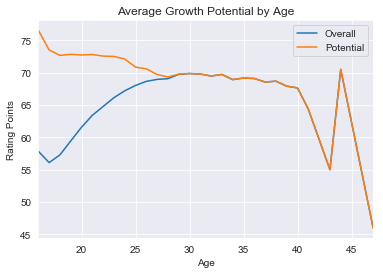

In [12]:
df_overall = df.groupby(['Age'])['Overall'].mean()
df_potential = df.groupby(['Age'])['Potential'].mean()

summary = pd.concat([df_overall, df_potential], axis=1)

axis = summary.plot()
axis.set_ylabel('Rating Points')
axis.set_title('Average Growth Potential by Age');

### Dream Team

In [13]:
def get_best_squad(position):
    df_copy = df.copy()
    store = []
    for i in position:
        store.append([i,
                      df_copy.loc[[df_copy[df_copy['Preferred Positions'] == i]['Overall'].idxmax()]]['Name'].to_string(index = False), 
                      df_copy[df_copy['Preferred Positions'] == i]['Overall'].max()])
        df_copy.drop(df_copy[df_copy['Preferred Positions'] == i]['Overall'].idxmax(), inplace = True)
    #return store
    return pd.DataFrame(np.array(store).reshape(11,3), columns = ['Position', 'Player', 'Overall']).to_string(index = False)

# 4-3-3
squad_433 = ['GK', 'LB', 'CB', 'CB', 'RB', 'LM', 'CDM', 'RM', 'LW', 'ST', 'RW']
print('4-3-3')
print(get_best_squad(squad_433))

4-3-3
Position              Player Overall
      GK            M. Neuer      92
      LB             Marcelo      87
      CB        Sergio Ramos      90
      CB        G. Chiellini      89
      RB            Carvajal      84
      LM          C. Eriksen      87
     CDM            T. Kroos      90
      RM        K. De Bruyne      89
      LW              Neymar      92
      ST   Cristiano Ronaldo      94
      RW            L. Messi      93


In [14]:
# 3-5-2
squad_352 = ['GK', 'LWB', 'CB', 'RWB', 'LM', 'CDM', 'CAM', 'CM', 'RM', 'LW', 'RW']
print ('3-5-2')
print (get_best_squad(squad_352))

3-5-2
Position         Player Overall
      GK       M. Neuer      92
     LWB        D. Rose      82
      CB   Sergio Ramos      90
     RWB      K. Walker      83
      LM     C. Eriksen      87
     CDM       T. Kroos      90
     CAM       Coutinho      86
      CM       N. Kanté      87
      RM   K. De Bruyne      89
      LW         Neymar      92
      RW       L. Messi      93


### Current Rating, Potential Rating and Corresponding team value by club

In [15]:
def get_best_squad(position, club = '*', measurement = 'Overall'):
    df_copy = df.copy()
    df_copy = df_copy[df_copy['Club'] == club]
    store = []
    for i in position:
        store.append([df_copy.loc[[df_copy[df_copy['Preferred Positions'].str.contains(i)][measurement].idxmax()]]['Preferred Positions'].to_string(index = False),
                      df_copy.loc[[df_copy[df_copy['Preferred Positions'].str.contains(i)][measurement].idxmax()]]['Name'].to_string(index = False), 
                      df_copy[df_copy['Preferred Positions'].str.contains(i)][measurement].max(), 
                      float(df_copy.loc[[df_copy[df_copy['Preferred Positions'].str.contains(i)][measurement].idxmax()]]['Value (M)'].to_string(index = False))])
        df_copy.drop(df_copy[df_copy['Preferred Positions'].str.contains(i)][measurement].idxmax(), inplace = True)
    #return store
    return np.mean([x[2] for x in store]).round(1), \
           pd.DataFrame(np.array(store).reshape(11,4), columns = ['Position', 'Player', measurement, 'Value (M)']).to_string(index = False), \
           np.sum([x[3] for x in store]).round(1)

# easier constraint
squad_433_adj = ['GK', 'B$', 'B$', 'B$', 'B$', 'M$', 'M$', 'M$', 'W$|T$', 'W$|T$', 'W$|T$']

# Example Output for Chelsea
rating_433_Chelsea_Overall, best_list_433_Chelsea_Overall, value_433_Chelsea_Overall = get_best_squad(squad_433_adj, 
                                                                                                      'Chelsea', 
                                                                                                      'Overall')


rating_433_Chelsea_Potential, best_list_433_Chelsea_Potential, value_433_Chelsea_Potential  = get_best_squad(squad_433_adj, 
                                                                                                             'Chelsea', 
                                                                                                             'Potential')

print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_Chelsea_Overall))
print('Total Value (M): {:.1f}'.format(value_433_Chelsea_Overall))
print(best_list_433_Chelsea_Overall)

print('-Potential-')
print('Average rating: {:.1f}'.format(rating_433_Chelsea_Potential))
print('Total Value (M): {:.1f}'.format(value_433_Chelsea_Potential))
print(best_list_433_Chelsea_Potential)

-Overall-
Average rating: 85.7
Total Value (M): 477.5
Position          Player Overall Value (M)
      GK     T. Courtois      89      59.0
      CB      David Luiz      86      33.0
      LB     Azpilicueta      85      37.5
      CB       G. Cahill      84      21.0
      RB      A. Rüdiger      82      24.5
      CM        N. Kanté      87      52.5
     CAM   Cesc Fàbregas      86      41.0
     CAM         Willian      84      31.5
      LW       E. Hazard      90      90.5
      ST     Diego Costa      86      46.0
      ST          Morata      84      41.0
-Potential-
Average rating: 87.9
Total Value (M): 454.0
Position           Player Potential Value (M)
      GK      T. Courtois        92      59.0
      LB      Azpilicueta        87      37.5
      CB       David Luiz        86      33.0
      RB       A. Rüdiger        86      24.5
      CB        G. Cahill        84      21.0
      CM         N. Kanté        90      52.5
     CDM   A. Christensen        89      23.0
      

### Let's gather ratings for other clubs as well

In [16]:
# very easy constraint since some club do not have strict squad
squad_352_adj = ['GK', 'B$', 'B$', 'B$', 'M$|W$|T$', 'M$|W$|T$', 'M$|W$|T$', 'M$|W$|T$', 'M$|W$|T$', 'W$|T$|M$', 'W$|T$|M$']

By_club = df.groupby(['Club'])['Overall'].mean()

def get_summary(squad):
    OP = []
    # only for top 100 clubs for shorter run-time
    for i in By_club.sort_values(ascending = False).index[0:100]:
        # for overall rating
        O_temp_rating, _, _  = get_best_squad(squad, club = i, measurement = 'Overall')
        # for potential rating & corresponding value
        P_temp_rating, _, P_temp_value = get_best_squad(squad, club = i, measurement = 'Potential')
        OP.append([i, O_temp_rating, P_temp_rating, P_temp_value])
    return OP

OP_df = pd.DataFrame(np.array(get_summary(squad_352_adj)).reshape(-1,4), 
                     columns = ['Club', 'Overall', 'Potential', 'Value of highest Potential squad'])

OP_df.set_index('Club', inplace = True)

OP_df = OP_df.astype(float)


print(OP_df.head(10))

                     Overall  Potential  Value of highest Potential squad
Club                                                                     
FC Barcelona            86.5       89.0                             504.0
Juventus                86.4       87.9                             386.0
Real Madrid CF          87.8       89.7                             606.5
FC Bayern Munich        87.5       89.0                             554.5
Paris Saint-Germain     85.3       88.5                             440.0
Manchester United       85.1       88.6                             376.5
Napoli                  82.7       85.5                             269.5
Roma                    82.3       84.5                             239.5
Sevilla FC              80.7       82.7                             188.0
Inter                   81.5       85.4                             210.4


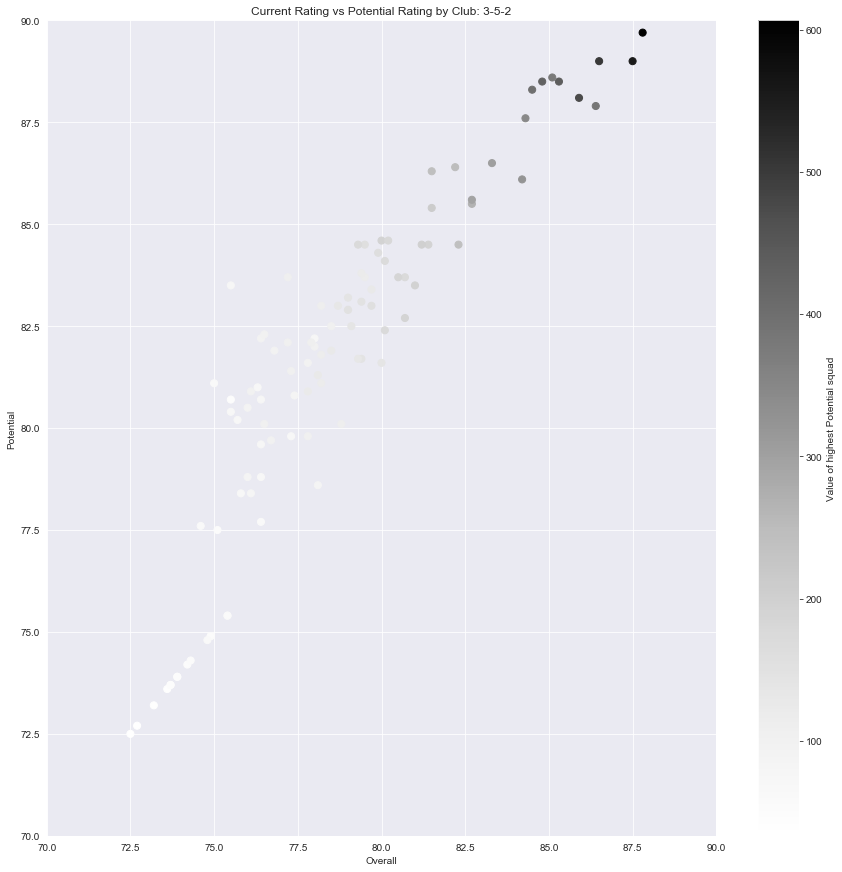

In [17]:
fig, ax = plt.subplots()
OP_df.plot(kind = 'scatter', x = 'Overall', y = 'Potential', 
           c = 'Value of highest Potential squad', 
           s = 50, figsize = (15,15), 
           xlim = (70, 90), ylim = (70, 90), 
           title = 'Current Rating vs Potential Rating by Club: 3-5-2', 
           ax = ax);

### Let's see is there any strong clubs with relatively low value. Let's drill down to top clubs with potential rating above 85

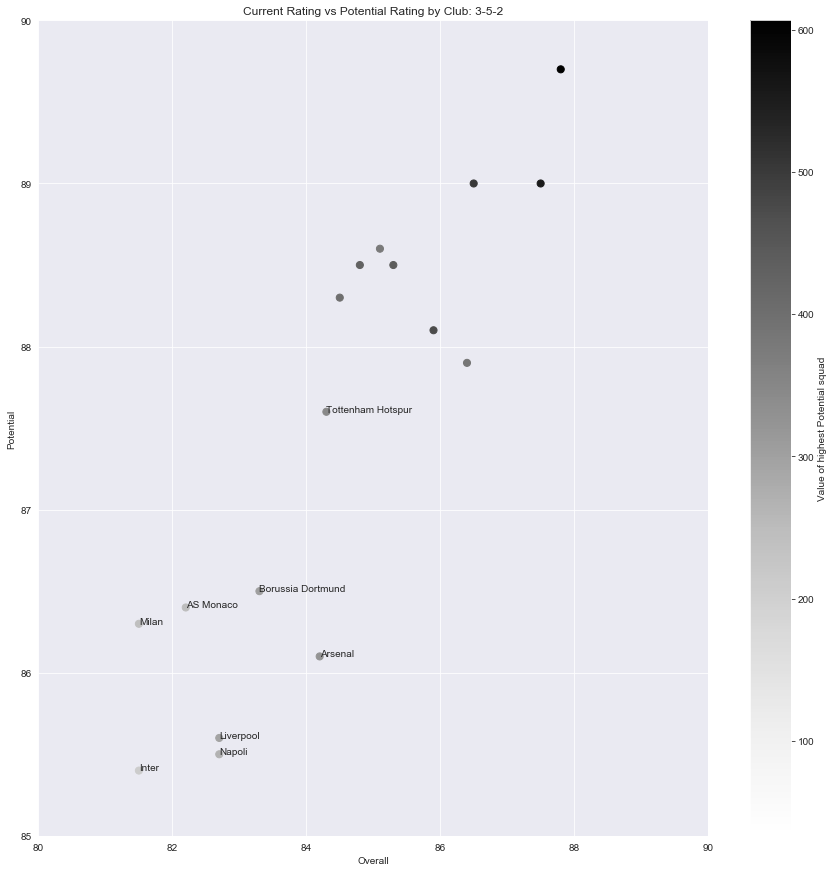

In [18]:
fig, ax = plt.subplots()
OP_df.plot(kind = 'scatter', x = 'Overall', y = 'Potential', 
           c = 'Value of highest Potential squad', 
           s = 50, figsize = (15,15), xlim = (80, 90), ylim = (85, 90), 
           title = 'Current Rating vs Potential Rating by Club: 3-5-2', 
           ax = ax)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))
       
OP_df['Club_label'] = OP_df.index

OP_df_sub = OP_df[(OP_df['Potential']>=85) & (OP_df['Value of highest Potential squad']<=350)]

label_point(OP_df_sub['Overall'], OP_df_sub['Potential'], OP_df_sub['Club_label'], ax)

### Supposed we have 350M to buy a club with existing squad and are interested in club with at least 85 potential ratings, then we should probably go for Tottenham Hotspur, and Aresenal is relatively a bad choice. Their best 11 squad is as follows:

In [19]:
squad_352_adj = ['GK', 'B$', 'B$', 'B$', 'M$|W$|T$', 'M$|W$|T$', 'M$|W$|T$', 'M$|W$|T$', 'M$|W$|T$', 'W$|T$|M$', 'W$|T$|M$']

rating_352_TH_Overall, best_list_352_TH_Overall, value_352_TH_Overall = get_best_squad(squad_352_adj, 'Tottenham Hotspur', 'Overall')
rating_352_TH_Potential, best_list_352_TH_Potential, value_352_TH_Potential  = get_best_squad(squad_352_adj, 'Tottenham Hotspur', 'Potential')

print('-Overall-')
print('Average rating: {:.1f}'.format(rating_352_TH_Overall))
print('Total Value (M): {:.1f}'.format(value_352_TH_Overall))
print(best_list_352_TH_Overall)

print('-Potential-')
print('Average rating: {:.1f}'.format(rating_352_TH_Potential))
print('Total Value (M): {:.1f}'.format(value_352_TH_Potential))
print(best_list_352_TH_Potential)

-Overall-
Average rating: 84.3
Total Value (M): 396.0
Position            Player Overall Value (M)
      GK         H. Lloris      88      38.0
      CB   T. Alderweireld      86      40.5
      CB     J. Vertonghen      85      28.5
     LWB           D. Rose      82      21.0
      LM        C. Eriksen      87      65.0
      ST           H. Kane      86      59.0
      LM           D. Alli      84      43.0
     CDM        M. Dembélé      83      25.0
      CM           E. Dier      82      25.0
      ST            H. Son      82      28.0
      CM        V. Wanyama      82      23.0
-Potential-
Average rating: 87.6
Total Value (M): 345.9
Position            Player Potential Value (M)
      GK         H. Lloris        88      38.0
      CB        D. Sánchez        88      21.5
      CB   T. Alderweireld        87      40.5
      CB          J. Foyth        86       1.7
      LM        C. Eriksen        91      65.0
      ST           H. Kane        90      59.0
      LM           D.

### Current and Future Squad by Country

In [20]:
def get_best_squad_n(position, nationality, measurement = 'Overall'):
    df_copy = df.copy()
    df_copy = df_copy[df_copy['Nationality'] == nationality]
    store = []
    for i in position:
        store.append([df_copy.loc[[df_copy[df_copy['Preferred Positions'].str.contains(i)][measurement].idxmax()]]['Preferred Positions'].to_string(index = False),
                      df_copy.loc[[df_copy[df_copy['Preferred Positions'].str.contains(i)][measurement].idxmax()]]['Name'].to_string(index = False), 
                      df_copy[df_copy['Preferred Positions'].str.contains(i)][measurement].max()])
        df_copy.drop(df_copy[df_copy['Preferred Positions'].str.contains(i)][measurement].idxmax(), inplace = True)
    #return store
    return np.mean([x[2] for x in store]).round(2), pd.DataFrame(np.array(store).reshape(11,3), columns = ['Position', 'Player', measurement]).to_string(index = False)

def get_summary_n(squad_list, squad_name, nationality_list):
    OP_n = []

    for i in nationality_list:
        count = 0
        for j in squad_list:
            # for overall rating
            O_temp_rating, _  = get_best_squad_n(position = j, nationality = i, measurement = 'Overall')
            # for potential rating & corresponding value
            P_temp_rating, _ = get_best_squad_n(position = j, nationality = i, measurement = 'Potential')
            OP_n.append([i, squad_name[count], O_temp_rating.round(2), P_temp_rating.round(2)])    
            count += 1
    return OP_n

In [21]:
squad_352_strict = ['GK', 'LB|LWB', 'CB', 'RB|RWB', 'LM|W$', 'RM|W$', 'CM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'W$|T$', 'W$|T$']
squad_442_strict = ['GK', 'LB|LWB', 'CB', 'CB', 'RB|RWB', 'LM|W$', 'RM|W$', 'CM', 'CM|CAM|CDM', 'W$|T$', 'W$|T$']
squad_433_strict = ['GK', 'LB|LWB', 'CB', 'CB', 'RB|RWB', 'CM|LM|W$', 'CM|RM|W$', 'CM|CAM|CDM', 'W$|T$', 'W$|T$', 'W$|T$']
squad_343_strict = ['GK', 'LB|LWB', 'CB', 'RB|RWB', 'LM|W$', 'RM|W$', 'CM|CAM|CDM', 'CM|CAM|CDM', 'W$|T$', 'W$|T$', 'W$|T$']
squad_532_strict = ['GK', 'LB|LWB', 'CB|LWB|RWB', 'CB|LWB|RWB', 'CB|LWB|RWB', 'RB|RWB', 'M$|W$', 'M$|W$', 'M$|W$', 'W$|T$', 'W$|T$']


squad_list = [squad_352_strict, squad_442_strict, squad_433_strict, squad_343_strict, squad_532_strict]
squad_name = ['3-5-2', '4-4-2', '4-3-3', '3-4-3', '5-3-2']

### England

In [22]:
rating_352_EN_Overall, best_list_352_EN_Overall = get_best_squad_n(squad_352_strict, 'England', 'Overall')
rating_352_EN_Potential, best_list_352_EN_Potential = get_best_squad_n(squad_352_strict, 'England', 'Potential')

print('-Overall-')
print('Average rating: {:.1f}'.format(rating_352_EN_Overall))
print(best_list_352_EN_Overall)

print('-Potential-')
print('Average rating: {:.1f}'.format(rating_352_EN_Potential))
print(best_list_352_EN_Potential)

-Overall-
Average rating: 82.8
Position         Player Overall
      GK        J. Hart      82
     LWB        D. Rose      82
      CB      G. Cahill      84
     RWB      K. Walker      83
      LM        D. Alli      84
      RW     R. Barkley      81
      CM     A. Lallana      83
      CM        E. Dier      82
      CM   J. Henderson      82
      ST        H. Kane      86
      ST   D. Sturridge      82
-Potential-
Average rating: 87.5
Position                  Player Potential
      GK              J. Butland        87
      LB                 L. Shaw        84
      CB                M. Keane        87
     RWB   A. Oxlade-Chamberlain        85
      LM                 D. Alli        90
      RM             M. Rashford        89
      CM                A. Gomes        90
      CM                 E. Dier        87
     CAM              M. Edwards        87
      ST                 H. Kane        90
      RW              R. Barkley        86


In [23]:
OP_df_n = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['England'])).reshape(-1,4), 
                       columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
OP_df_n.set_index('Nationality', inplace = True)
OP_df_n[['Overall', 'Potential']] = OP_df_n[['Overall', 'Potential']].astype(float)

print (OP_df_n)

             Squad  Overall  Potential
Nationality                           
England      3-5-2    82.82      87.45
England      4-4-2    82.73      87.27
England      4-3-3    82.73      87.00
England      3-4-3    82.73      87.36
England      5-3-2    82.82      87.00
